In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn
from sklearn import linear_model
import os
from zipfile import ZipFile 
import requests
import subprocess
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\ldiaz\\git_taro'

In [3]:
url = "https://observatorio.ministeriodesarrollosocial.gob.cl/storage/docs/casen/2022/Base%20de%20datos%20Casen%202022%20STATA_18%20marzo%202024.dta.zip"
casen_temp = "casen.zip"

In [4]:
# Descarga el archivo
response = requests.get(url)
with open(casen_temp, 'wb') as file:
    file.write(response.content)


In [5]:

# Verifica que el archivo se haya descargado correctamente
if os.path.exists(casen_temp):
    print("Archivo descargado exitosamente.")

    # Ruta del directorio donde deseas descomprimir el archivo
    ruta_descompresion = "casen"

    # Crea el directorio si no existe
    os.makedirs(ruta_descompresion, exist_ok=True)
    
    # Descomprime el archivo y guarda el nombre del archivo Stata
    nombre_archivo_stata = None
    with ZipFile(casen_temp, 'r') as zip_ref:
        zip_ref.extractall(ruta_descompresion)
        for file_info in zip_ref.infolist():
            if file_info.filename.endswith('.dta') and not file_info.filename.startswith('__MACOSX/'):
                nombre_archivo_stata = file_info.filename
    print(nombre_archivo_stata)

else:
    print("Error al descargar el archivo.")



Archivo descargado exitosamente.
Base de datos Casen 2022 STATA_18 marzo 2024.dta


In [6]:
directorio_actual = os.getcwd()
os.chdir(directorio_actual + "/"+ ruta_descompresion)
directorio_actual = os.getcwd()
os.getcwd()


'C:\\Users\\ldiaz\\git_taro\\casen'

In [7]:
           
if nombre_archivo_stata:
    print(f"Archivo Stata encontrado: {nombre_archivo_stata}")

    # Ruta completa del archivo Stata
    ruta_completa_stata =directorio_actual  +"\\" + nombre_archivo_stata
    print(ruta_completa_stata)

    # Crear un script de Stata para convertir el archivo a una versión compatible
    script_stata = """
    clear
    set more off
    use "{input_file}", clear
    saveold "{output_file}", version(14) replace
    exit
    """.format(input_file=ruta_completa_stata, output_file=ruta_completa_stata.replace(".dta", "_converted.dta"))

else:
    print("No se encontró ningún archivo Stata en el archivo ZIP.")


Archivo Stata encontrado: Base de datos Casen 2022 STATA_18 marzo 2024.dta
C:\Users\ldiaz\git_taro\casen\Base de datos Casen 2022 STATA_18 marzo 2024.dta


In [8]:
# Guardar el script en un archivo temporal
script_path = directorio_actual +"\convert_to_old_version.do"
with open(script_path, 'w') as script_file:
    script_file.write(script_stata)
    
print(script_path)

C:\Users\ldiaz\git_taro\casen\convert_to_old_version.do


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ldiaz\AppData\Local\Temp\ipykernel_524\3016368838.py:2: SyntaxWarning: invalid escape sequence '\c'
  script_path = directorio_actual +"\convert_to_old_version.do"


In [9]:
# Ejecutar el script de Stata. Requiere conocer la ruta del ejecutable de stata.
# Especificar la ruta completa al ejecutable de Stata
ruta_completa_a_stata = "D:\\Stata\\StataMP-64.exe"  # Reemplaza esta ruta con la ruta en que tu tengas stata

# Ejecutar el script de Stata
subprocess.run([ruta_completa_a_stata, "-b", "do", script_path])


CompletedProcess(args=['D:\\Stata\\StataMP-64.exe', '-b', 'do', 'C:\\Users\\ldiaz\\git_taro\\casen\\convert_to_old_version.do'], returncode=0)

In [10]:

# Leer el archivo convertido con pandas
ruta_convertida_stata = ruta_completa_stata.replace(".dta", "_converted.dta")
print(ruta_convertida_stata)
df = pd.read_stata(ruta_convertida_stata, convert_categoricals=False)

print("Base de datos cargada exitosamente.")


C:\Users\ldiaz\git_taro\casen\Base de datos Casen 2022 STATA_18 marzo 2024_converted.dta


C:\Users\ldiaz\AppData\Local\Temp\ipykernel_524\3509139969.py:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(ruta_convertida_stata, convert_categoricals=False)


Base de datos cargada exitosamente.


In [11]:
df.head()

,id_vivienda,folio,id_persona,region,area,cod_upm,nse,estrato,hogar,expr,...,men18c,may60c,tipohogar,tot_hog,ind_hacina,indsan,ten_viv,ten_viv_f,allega_ext,allega_int
0,1000901,100090101,1,16,2,10009,4,1630324,1,43,...,0,1,3,1,1,1,1,1,0,0
1,1000901,100090101,2,16,2,10009,4,1630324,1,43,...,0,1,3,1,1,1,1,1,0,0
2,1000901,100090101,3,16,2,10009,4,1630324,1,44,...,0,1,3,1,1,1,1,1,0,0
3,1000902,100090201,1,16,2,10009,4,1630324,1,51,...,1,1,5,1,1,2,1,1,0,1
4,1000902,100090201,2,16,2,10009,4,1630324,1,51,...,1,1,5,1,1,2,1,1,0,1


In [137]:
df2=df[[ "region", "area", "esc" , "sexo", "edad", "yaut"]]
df2 = df2.fillna(0)  # Rellena todos los NaN con 0
df2.head()

,region,area,esc,sexo,edad,yaut
0,16,2,1.0,2,72,10000.0
1,16,2,4.0,1,67,14000.0
2,16,2,15.0,2,40,0.0
3,16,2,0.0,1,56,0.0
4,16,2,12.0,2,25,0.0


In [14]:
X= df2[[ "region", "area", "esc" , "sexo", "edad"]]
y=df2["yaut"]

In [15]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression()

In [16]:
reg.coef_

array([   4913.0842308 ,  -54554.21776767,   42051.24116675,
       -186493.15611759,    2237.01672425])

COMO NO SIRVE MUCHO EL SCIKIT LEARN, PROBAREMOS OTRO PAQUETE


# Ahora limpiar la base y eliminar outliers

In [139]:
#Me quedo con los valores de adultos con ingresos mayores a 0
df2=df2[df2["edad"]>=18]
df2=df2[df2["yaut"]>0]

#Defino la variable mujer, rural y escolaridad al cuadrado
df2["mujer"]= np.where(df2["sexo"] ==2 , 1 , 0 )
df2["rural"]= np.where(df2["area"] ==2 , 1 , 0 )

df2["esc2"]= df2["esc"]**2

df2 = df2.drop(columns=['sexo','area'])

# Definir las condiciones para tramo educacional
conditions = [
    (df2['esc'] >= 8  ) & (df2['esc'] < 12  ) ,
    (df2['esc'] >= 12  ) & (df2['esc'] < 16  ),
     (df2['esc'] >= 12  ) 
    
]

# Definir los valores correspondientes a las condiciones
choices = [1, 2, 3]

# Añadir la nueva columna "A" basada en las condiciones
df2["tramo_educ"] = np.select(conditions, choices, default=0)


#Genero la variable logaritmo natural del salario, para ver cambios porcentuales
df2["lnw"]= np.log(df2["yaut"])


In [141]:
#Genero dummies por cada región y elimino la región metropolitana.

df2 = pd.get_dummies(df2, columns=['region'], drop_first=False)

dummies = df2.filter(like='region_').astype(int)
df2[dummies.columns] = dummies

df2= df2.drop(columns=["region_13"])
df2.sample(5)

,esc,edad,yaut,mujer,rural,esc2,tramo_educ,lnw,region_1,region_2,...,region_6,region_7,region_8,region_9,region_10,region_11,region_12,region_14,region_15,region_16
39529,20.0,32,925000.0,0,1,400.0,3,13.737549,0,0,...,0,0,0,0,0,0,0,0,0,0
123045,17.0,31,753333.0,1,0,289.0,3,13.532263,0,0,...,0,0,1,0,0,0,0,0,0,0
96513,10.0,54,323333.0,1,0,100.0,1,12.686438,1,0,...,0,0,0,0,0,0,0,0,0,0
201279,8.0,61,300000.0,1,0,64.0,1,12.611538,0,0,...,0,0,1,0,0,0,0,0,0,0
126294,14.0,36,1605833.0,0,1,196.0,2,14.289153,0,0,...,0,0,0,0,0,0,1,0,0,0


In [143]:
# Separar las variables dependientes e independientes
y = df2['lnw']
X = df2.drop(columns=['yaut', 'tramo_educ',"lnw"])
# Agregar una constante a los regresores
X = sm.add_constant(X)

In [131]:
y

0          9.210340
1          9.546813
2              -inf
3              -inf
4              -inf
            ...    
202222    14.087191
202225    14.151983
202227    14.508658
202228         -inf
202230    13.815511
Name: lnw, Length: 158509, dtype: float64

In [145]:
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()


In [147]:
# Obtener los resultados del modelo
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1736.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:08:12   Log-Likelihood:            -1.4072e+05
No. Observations:              109838   AIC:                         2.815e+05
Df Residuals:                  109817   BIC:                         2.817e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6232      0.019    678.342      0.0

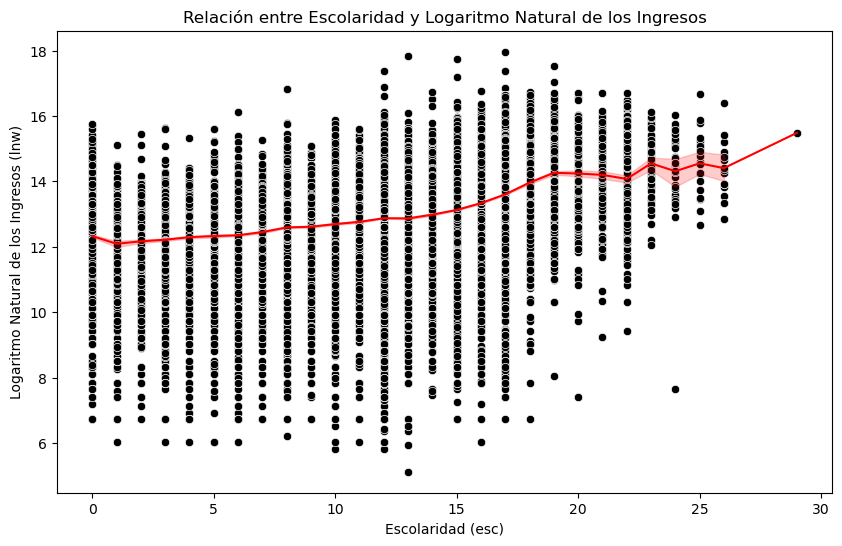

In [161]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='esc', y='lnw', data=df2 , color="black" )
sns.lineplot(x='esc', y='lnw', data=df2, color= "red")

# Añadir etiquetas y título
plt.xlabel('Escolaridad (esc)')
plt.ylabel('Logaritmo Natural de los Ingresos (lnw)')
plt.title('Relación entre Escolaridad y Logaritmo Natural de los Ingresos')

# Mostrar el gráfico
plt.show()

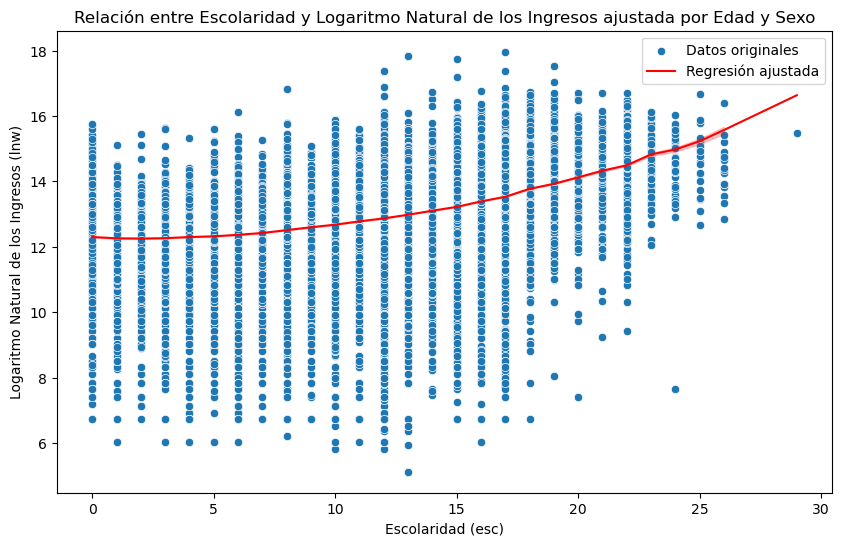

In [157]:
# Calcular los valores ajustados de lnw para los valores de esc manteniendo constantes edad y sexo
df2['lnw_ajustado'] = model.predict(X)

# Crear un gráfico de dispersión con la línea de regresión ajustada
plt.figure(figsize=(10, 6))
sns.scatterplot(x='esc', y='lnw', data=df2, label='Datos originales')
sns.lineplot(x='esc', y='lnw_ajustado', data=df2, color='red', label='Regresión ajustada')

# Añadir etiquetas y título
plt.xlabel('Escolaridad (esc)')
plt.ylabel('Logaritmo Natural de los Ingresos (lnw)')
plt.title('Relación entre Escolaridad y Logaritmo Natural de los Ingresos ajustada por Edad y Sexo')
plt.legend()

# Mostrar el gráfico
plt.show()

AHORA VOY A HACER LO MISMO CON LA VARIABLE SIN TRANSFORMA (YAUT)

In [164]:
# Ajustar el modelo de regresión lineal
y2= df2["yaut"]
model2 = sm.OLS(y2, X).fit()

results2= model.summary()
print(results2)

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     1736.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:26:18   Log-Likelihood:            -1.4072e+05
No. Observations:              109838   AIC:                         2.815e+05
Df Residuals:                  109817   BIC:                         2.817e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6232      0.019    678.342      0.0

In [170]:
# Calcular los valores ajustados de lnw para los valores de esc manteniendo constantes edad y sexo
df2['yaut_ajustado'] = model2.predict(X)


In [180]:
# Me quedo con los residuos para hacer el gráfico más ajustado a la regresión líneal
df2['lnw_residuos'] = model.resid
df2['yaut_residuos'] = model2.resid

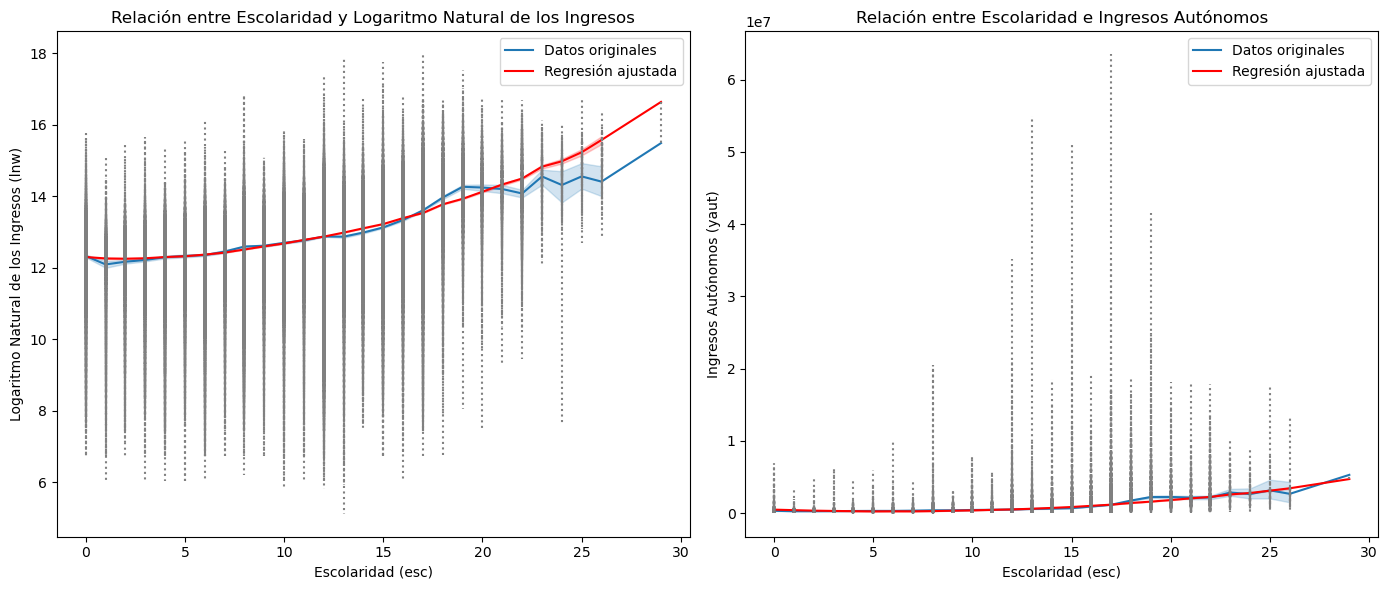

In [184]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primer subplot: lnw
sns.lineplot(x='esc', y='lnw', data=df2, ax=axes[0], label='Datos originales')
sns.lineplot(x='esc', y='lnw_ajustado', data=df2, color='red', ax=axes[0], label='Regresión ajustada')
for i in range(len(df2)):
    axes[0].plot([df2['esc'].iloc[i], df2['esc'].iloc[i]], 
                 [df2['lnw_ajustado'].iloc[i], df2['lnw_ajustado'].iloc[i] + df2['lnw_residuos'].iloc[i]], 
                 color='gray', linestyle='dotted')
    
axes[0].set_title('Relación entre Escolaridad y Logaritmo Natural de los Ingresos')
axes[0].set_xlabel('Escolaridad (esc)')
axes[0].set_ylabel('Logaritmo Natural de los Ingresos (lnw)')
axes[0].legend()

# Segundo subplot: yaut
sns.lineplot(x='esc', y='yaut', data=df2, ax=axes[1], label='Datos originales')
sns.lineplot(x='esc', y='yaut_ajustado', data=df2, color='red', ax=axes[1], label='Regresión ajustada')
for i in range(len(df2)):
    axes[1].plot([df2['esc'].iloc[i], df2['esc'].iloc[i]], 
                 [df2['yaut_ajustado'].iloc[i], df2['yaut_ajustado'].iloc[i] + df2['yaut_residuos'].iloc[i]], 
                 color='gray', linestyle='dotted')
    
axes[1].set_title('Relación entre Escolaridad e Ingresos Autónomos')
axes[1].set_xlabel('Escolaridad (esc)')
axes[1].set_ylabel('Ingresos Autónomos (yaut)')
axes[1].legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()